First import the stuff

In [4]:
%pip install -Uqq fastai
%pip install -Uqq duckduckgo_search

from duckduckgo_search import ddg_images
from fastbook import load_learner
from fastcore.all import *
from fastai.vision.all import *
from time import sleep

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Search images setup

In [2]:
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
berry_arr = ["strawberry", "blueberry", "raspberry", "cranberry", "mulberry", "other"]

for x in berry_arr:
    dest = Path("berries\\" + x)
    dest.mkdir(exist_ok=True, parents=True)
    
    download_images(dest, urls=search_images(f'{x} photo'))
    sleep(10)




In [4]:
failed = verify_images(get_image_files("berries"))
failed.map(Path.unlink)
len(failed)

15

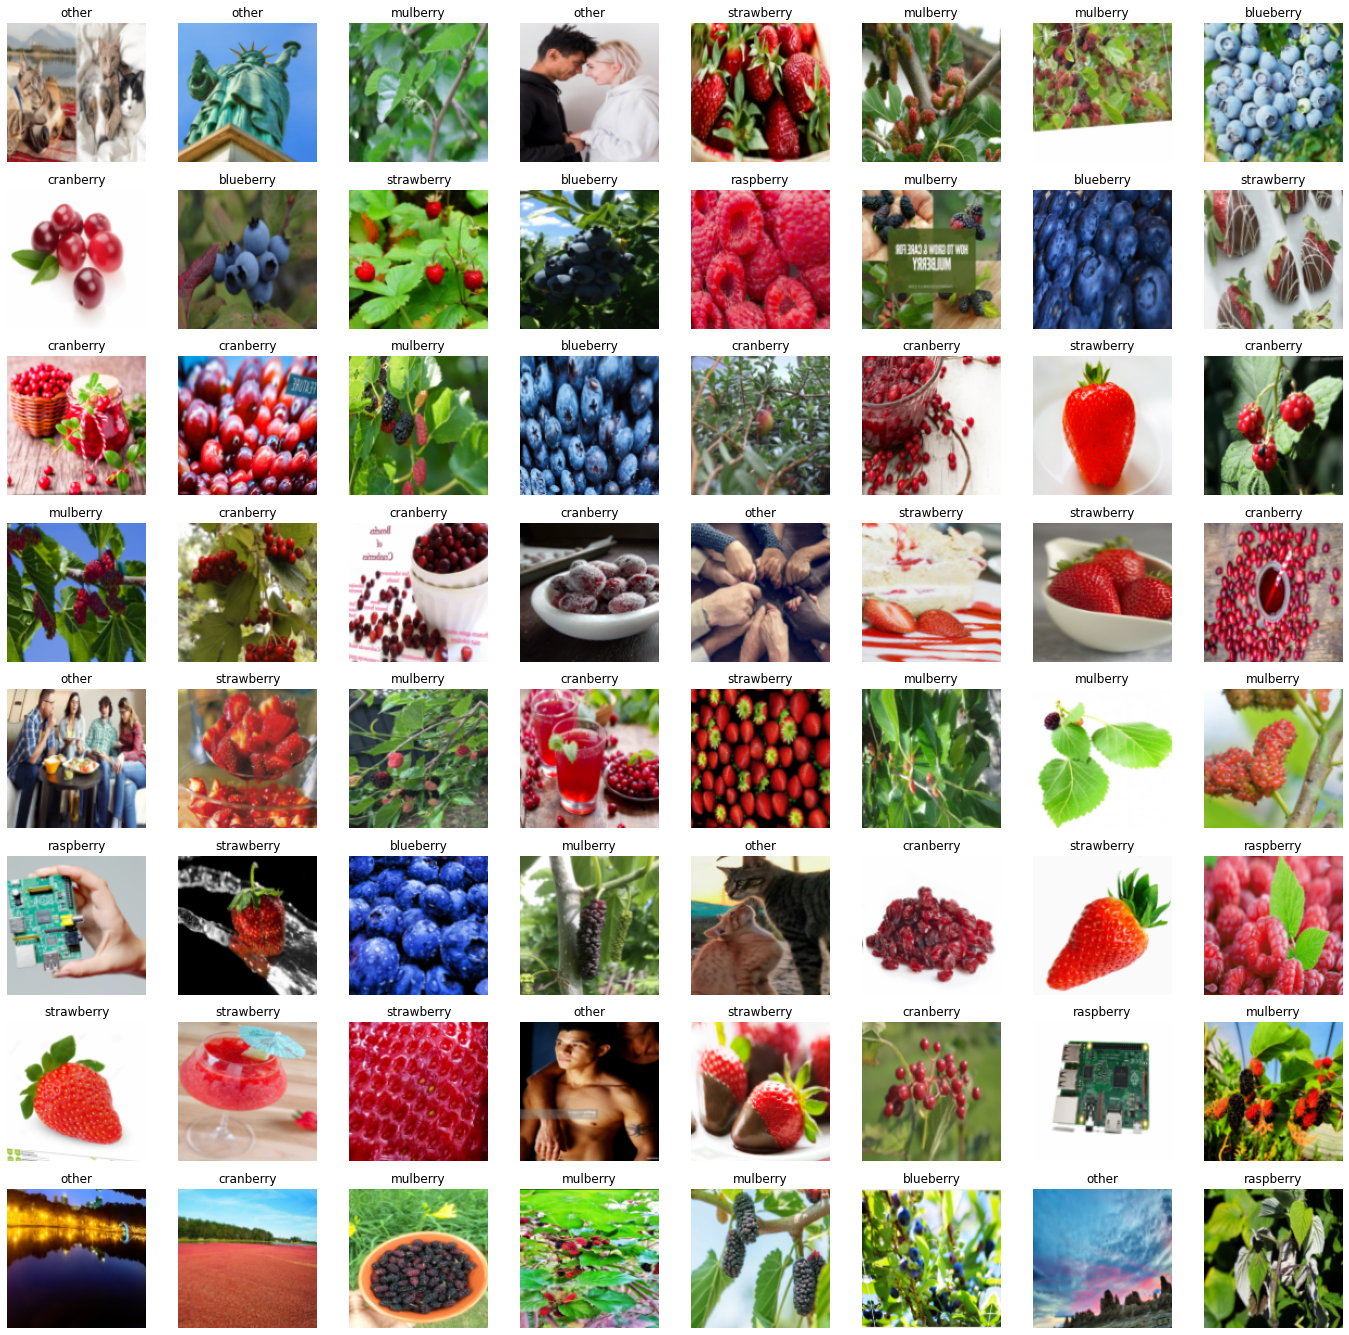

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=69),
    get_y=parent_label,
    item_tfms=[Resize(128, method='squish')],
    batch_tfms=aug_transforms(mult=1)
).dataloaders("berries")

dls.show_batch(max_n=64)

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

C:\Users\Peter\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Peter\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


C:\Users\Peter\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
learn = load_learner('berry_model.pkl')

In [8]:
thing,_,probs = learn.predict(PILImage.create('strawberry.jpg'))
print(f"This is a: {thing}.")
print(f"Probability it's a {thing}: {probs[0]}")

This is a: strawberry.
Probability it's a strawberry: 1.6060575092069485e-08


In [8]:
learn.export('berry_model.pkl')

In [9]:
import os
os.system("shutdown -a")
os.system("shutdown /s /t 1")

1190